Algorithmic Trading using MACD Strategy

Aaron De la Rosa

In [1]:
import os
from math import *
from scipy.stats import norm
import numpy as np
import pandas as pd
import scipy
from datetime import datetime, timedelta
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use("dark_background")
import pandas_datareader as pdr
import yfinance as yf

In [2]:
tesla = yf.download(tickers='TSLA', period='1y', interval='1d')
nvda = yf.download(tickers='NVDA', period='1y', interval='1d')
google = yf.download(tickers='GOOGL', period='1y', interval='1d')
microsoft = yf.download(tickers='MSFT', period='1y', interval='1d')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


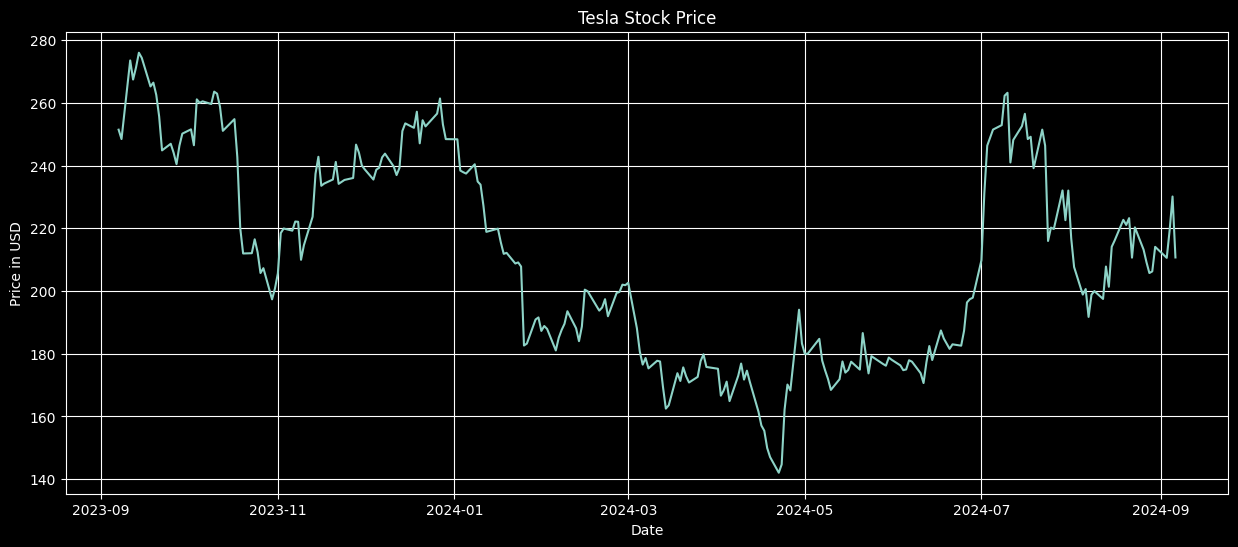

In [3]:
fig = plt.figure(figsize=(15,6))
plt.plot(tesla['Close'], label='Close')
plt.title('Tesla Stock Price')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.grid()
plt.show()

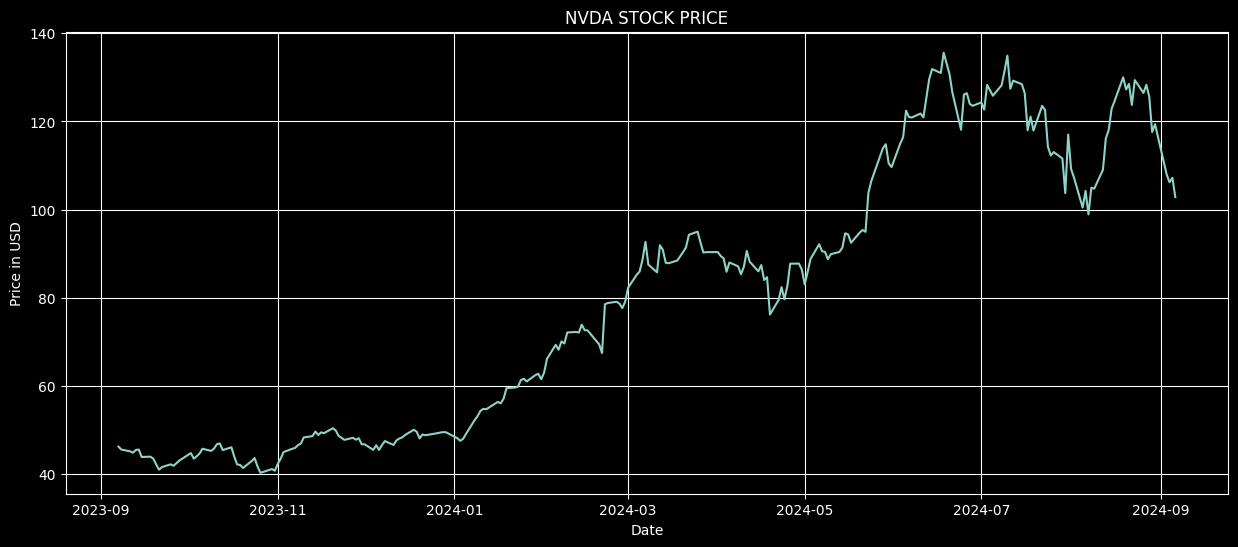

In [4]:
fig = plt.figure(figsize=(15, 6))
plt.plot(nvda['Close'], label='Close')
plt.title('NVDA STOCK PRICE')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.grid()
plt.show()

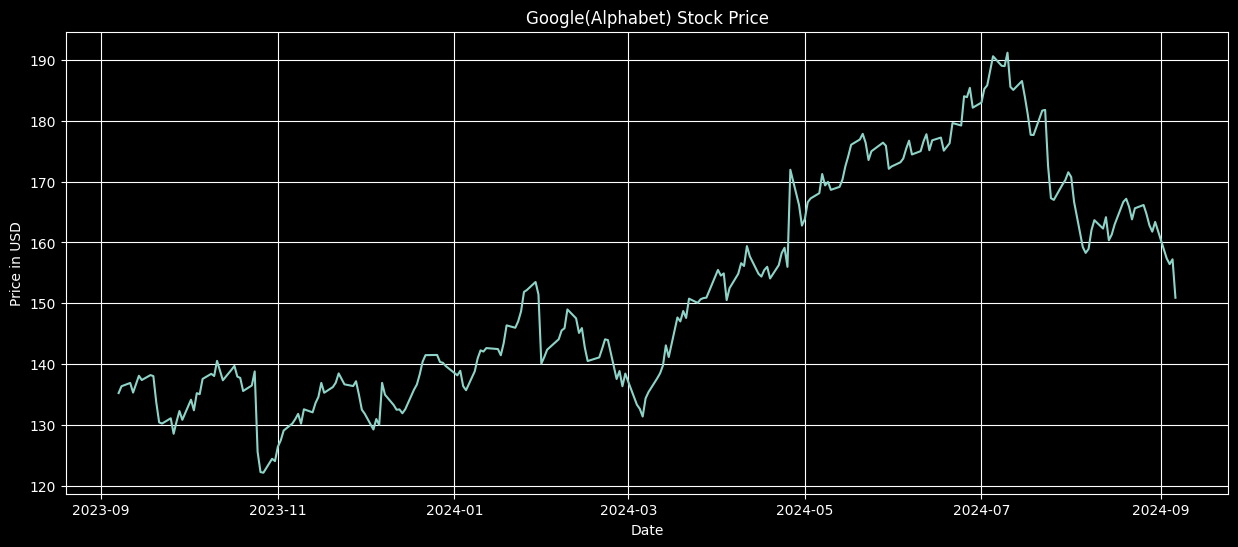

In [5]:
fig = plt.figure(figsize=(15, 6))
plt.plot(google['Close'], label='Close')
plt.title('Google(Alphabet) Stock Price')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.grid()
plt.show()

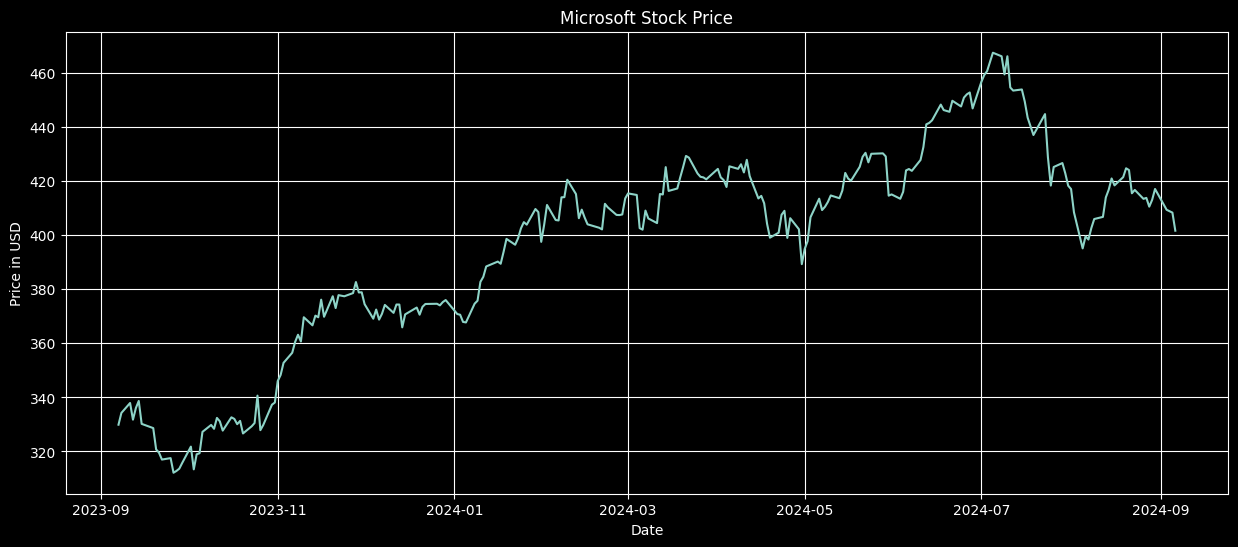

In [6]:
fig = plt.figure(figsize=(15, 6))
plt.plot(microsoft['Close'], label='Close')
plt.title('Microsoft Stock Price')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.grid()
plt.show()

In [7]:
# Calculating EMAs, MACD & Signal

def calculate_shortEMA(df):
    ShortEMA = df.Close.ewm(span=12, adjust=False).mean()
#     print(ShortEMA)
    return ShortEMA

def calculate_longEMA(df):
    LongEMA = df.Close.ewm(span=26, adjust=False).mean()
#     print(LongEMA)
    return LongEMA

def calculate_MACD(df):
    MACD = calculate_longEMA(df) - calculate_shortEMA(df)
#     print(MACD)
    return MACD

def calculate_signal(df):
    signal = calculate_MACD(df).ewm(span=9, adjust=False).mean()
#     print(signal)
    return signal

def histogram(df):
    histo  = calculate_MACD(df) - calculate_signal(df)
#     print(histo)
    return histo

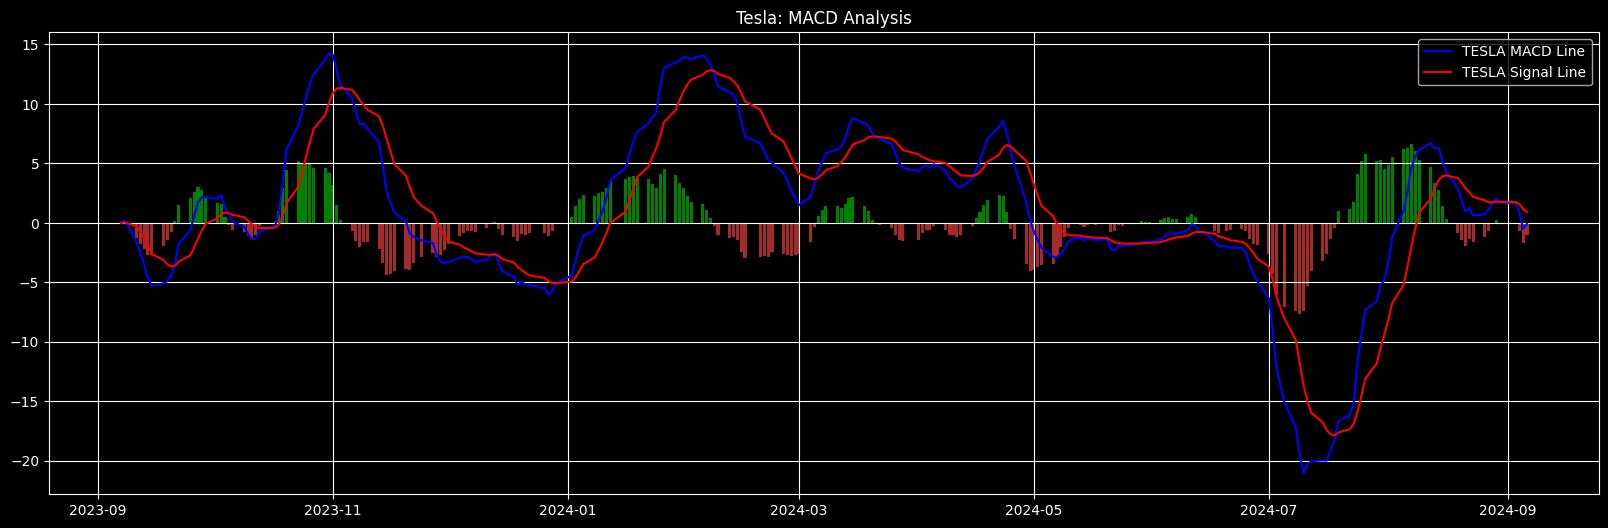

In [8]:
fig = plt.figure(figsize=(20, 6))
plt.plot(tesla.index, calculate_MACD(tesla), label = "TESLA MACD Line", color = 'blue')
plt.plot(tesla.index, calculate_signal(tesla), label = 'TESLA Signal Line', color = 'red')

for i in range(len(tesla)):
        if str(histogram(tesla)[i])[0] == '-':
            plt.bar(tesla.index[i], histogram(tesla)[i], color = 'brown')#'#ef5350')
        else:
            plt.bar(tesla.index[i], histogram(tesla)[i], color = 'green')#'#26a69a')

plt.legend(loc='upper right')
plt.title("Tesla: MACD Analysis")
plt.grid()
plt.show()

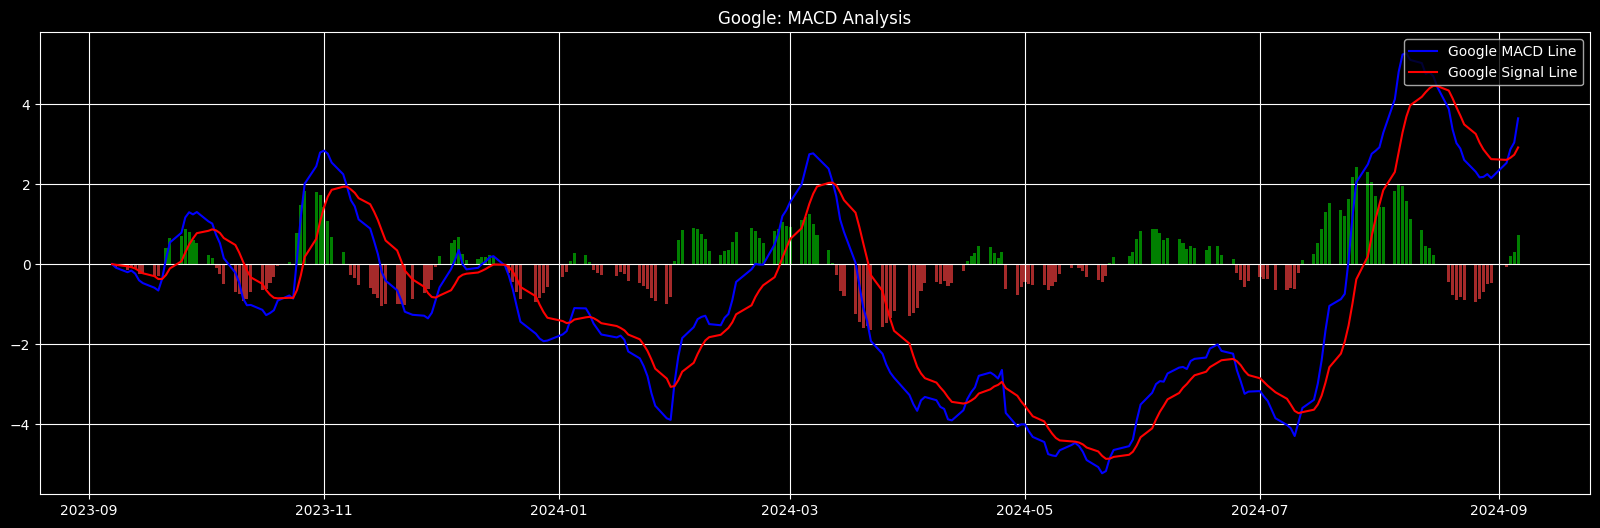

In [9]:
fig = plt.figure(figsize=(20, 6))
plt.plot(google.index, calculate_MACD(google), label = "Google MACD Line", color = 'blue')
plt.plot(google.index, calculate_signal(google), label = 'Google Signal Line', color = 'red')

for i in range(len(google)):
        if str(histogram(google)[i])[0] == '-':
            plt.bar(google.index[i], histogram(google)[i], color = 'brown')#'#ef5350')
        else:
            plt.bar(google.index[i], histogram(google)[i], color = 'green')#'#26a69a')

plt.legend(loc='upper right')
plt.title("Google: MACD Analysis")
plt.grid()
plt.show()

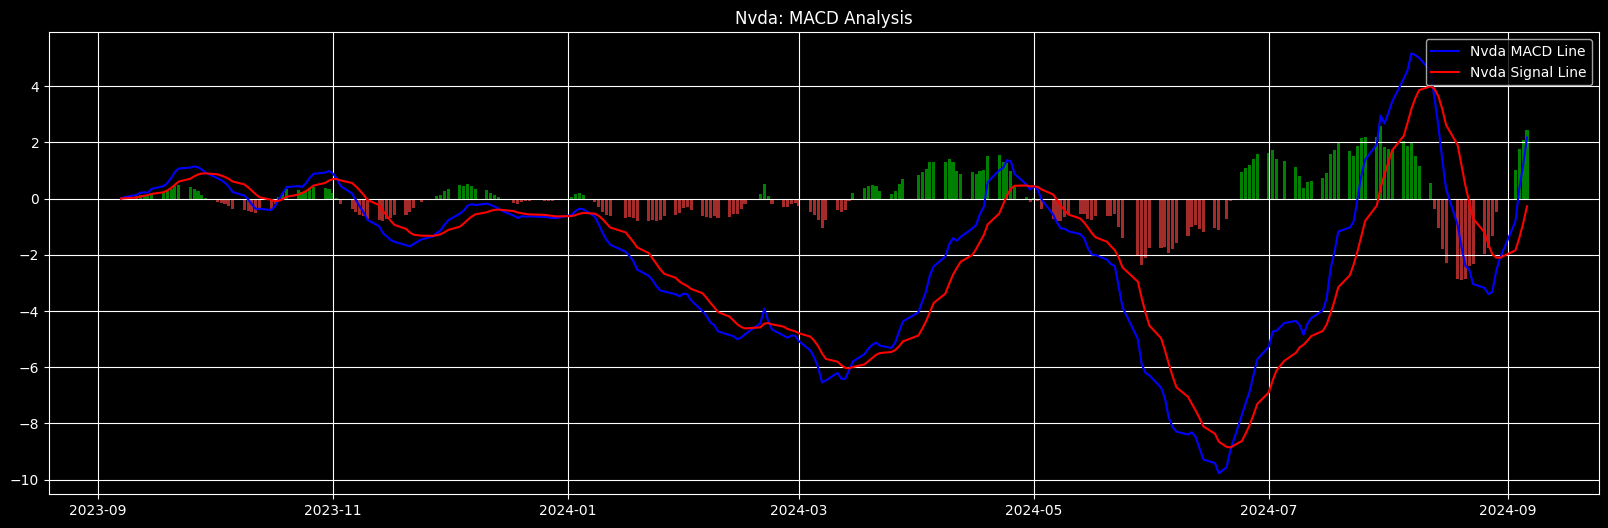

In [10]:
fig = plt.figure(figsize=(20, 6))
plt.plot(nvda.index, calculate_MACD(nvda), label = "Nvda MACD Line", color = 'blue')
plt.plot(nvda.index, calculate_signal(nvda), label = 'Nvda Signal Line', color = 'red')

for i in range(len(nvda)):
        if str(histogram(nvda)[i])[0] == '-':
            plt.bar(nvda.index[i], histogram(nvda)[i], color = 'brown')#'#ef5350')
        else:
            plt.bar(nvda.index[i], histogram(nvda)[i], color = 'green')#'#26a69a')

plt.legend(loc='upper right')
plt.title("Nvda: MACD Analysis")
plt.grid()
plt.show()

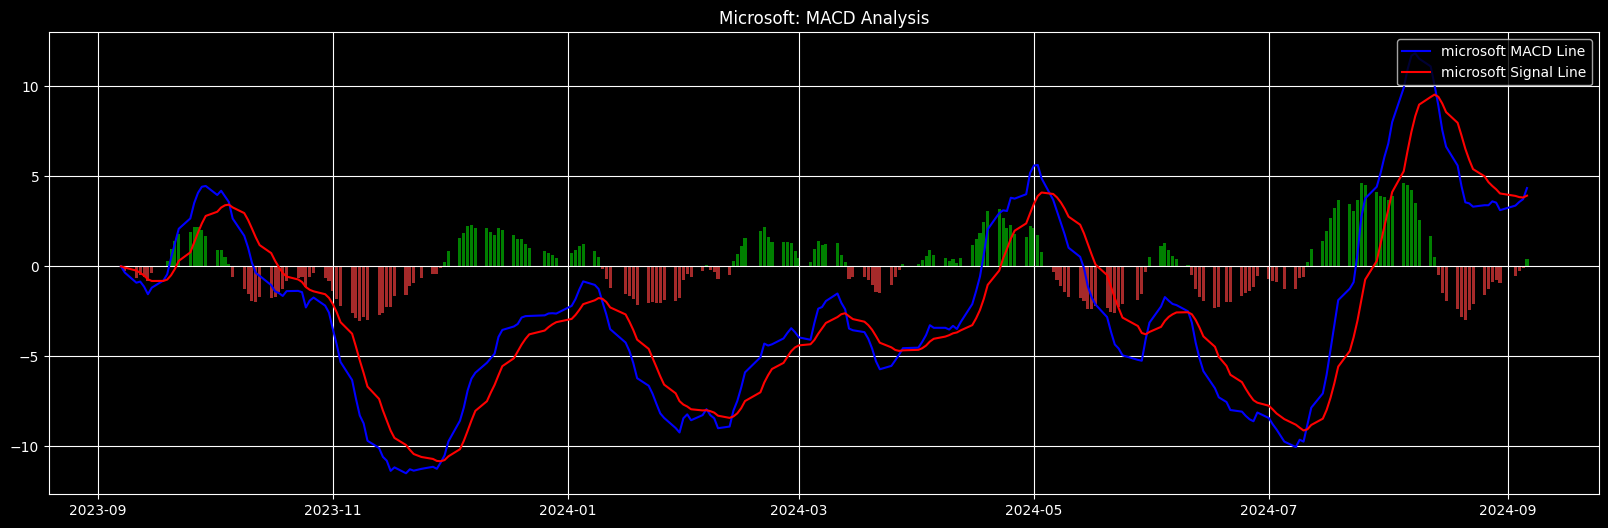

In [11]:
fig = plt.figure(figsize=(20, 6))
plt.plot(microsoft.index, calculate_MACD(microsoft), label = "microsoft MACD Line", color = 'blue')
plt.plot(microsoft.index, calculate_signal(microsoft), label = 'microsoft Signal Line', color = 'red')

for i in range(len(microsoft)):
        if str(histogram(microsoft)[i])[0] == '-':
            plt.bar(microsoft.index[i], histogram(microsoft)[i], color = 'brown')#'#ef5350')
        else:
            plt.bar(microsoft.index[i], histogram(microsoft)[i], color = 'green')#'#26a69a')

plt.legend(loc='upper right')
plt.title("Microsoft: MACD Analysis")
plt.grid()
plt.show()

In [12]:
tesla

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-07,245.070007,252.809998,243.270004,251.490005,251.490005,115312900
2023-09-08,251.220001,256.519989,246.669998,248.500000,248.500000,118367700
2023-09-11,264.269989,274.850006,260.609985,273.579987,273.579987,174667900
2023-09-12,270.760010,278.390015,266.600006,267.480011,267.480011,135999900
2023-09-13,270.070007,274.980011,268.100006,271.299988,271.299988,111673700
...,...,...,...,...,...,...
2024-08-30,208.630005,214.570007,207.029999,214.110001,214.110001,63370600
2024-09-03,215.259995,219.899994,209.639999,210.600006,210.600006,76714200
2024-09-04,210.589996,222.220001,210.570007,219.410004,219.410004,80651800


In [13]:
tesla['MACD'] = calculate_MACD(tesla)
tesla['Signal Line'] = calculate_signal(tesla)
nvda['MACD'] = calculate_MACD(nvda)
nvda['Signal Line'] = calculate_signal(nvda)
microsoft['MACD'] = calculate_MACD(microsoft)
microsoft['Signal Line'] = calculate_signal(microsoft)
google['MACD'] = calculate_MACD(google)
google['Signal Line'] = calculate_signal(google)
google

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line
Date,,,,,,,,
2023-09-07,133.589996,135.580002,132.949997,135.259995,135.104935,18844300,0.000000,0.000000
2023-09-08,134.910004,136.660004,134.850006,136.380005,136.223663,23558300,-0.089346,-0.017869
2023-09-11,136.539993,137.479996,135.789993,136.919998,136.763031,20763400,-0.201404,-0.054576
2023-09-12,136.259995,136.869995,135.190002,135.339996,135.184845,18405500,-0.160864,-0.075834
2023-09-13,135.089996,136.899994,134.149994,136.710007,136.553284,20749500,-0.236557,-0.107978
...,...,...,...,...,...,...,...,...
2024-08-30,162.619995,163.660004,161.690002,163.380005,163.380005,22123800,2.151475,2.624783
2024-09-03,161.720001,161.850006,156.479996,157.360001,157.360001,38945300,2.529838,2.605794
2024-09-04,156.660004,159.000000,155.960007,156.449997,156.449997,19353800,2.870039,2.658643


In [14]:
def buy_sell(dataframe):
    Buy = []
    Sell = []
    Flag = -1

    for i in range(0, len(dataframe)):
        # Go through each row to tell if the MACD line crosses the Signal Line
        if dataframe['MACD'][i] > dataframe['Signal Line'][i]:
            Sell.append(np.nan)
            if Flag != 1:
                Buy.append(dataframe['Close'][i])
                Flag = 1 #indicates we have been here
            else:
                Buy.append(np.nan)

        elif dataframe['MACD'][i] < dataframe['Signal Line'][i]:
            Buy.append(np.nan)
            if Flag != 0:
                Sell.append(dataframe['Close'][i])
                Flag = 0 #indicates we have been here
            else:
                Sell.append(np.nan)
        else:
            Sell.append(np.nan)
            Buy.append(np.nan)

    return (Sell, Buy)

tesla_signal = buy_sell(tesla)
tesla['Buy_Signal_Price'] = tesla_signal[0]
tesla['Sell_Signal_Price'] = tesla_signal[1]

nvda_signal = buy_sell(nvda)
nvda['Buy_Signal_Price'] = nvda_signal[0]
nvda['Sell_Signal_Price'] = nvda_signal[1]


microsoft_signal = buy_sell(microsoft)
microsoft['Buy_Signal_Price'] = microsoft_signal[0]
microsoft['Sell_Signal_Price'] = microsoft_signal[1]

google_signal = buy_sell(google)
google['Buy_Signal_Price'] = google_signal[0]
google['Sell_Signal_Price'] = google_signal[1]

google

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,,,,,,
2023-09-07,133.589996,135.580002,132.949997,135.259995,135.104935,18844300,0.000000,0.000000,NaN,NaN
2023-09-08,134.910004,136.660004,134.850006,136.380005,136.223663,23558300,-0.089346,-0.017869,136.380005,NaN
2023-09-11,136.539993,137.479996,135.789993,136.919998,136.763031,20763400,-0.201404,-0.054576,NaN,NaN
2023-09-12,136.259995,136.869995,135.190002,135.339996,135.184845,18405500,-0.160864,-0.075834,NaN,NaN
2023-09-13,135.089996,136.899994,134.149994,136.710007,136.553284,20749500,-0.236557,-0.107978,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-08-30,162.619995,163.660004,161.690002,163.380005,163.380005,22123800,2.151475,2.624783,NaN,NaN
2024-09-03,161.720001,161.850006,156.479996,157.360001,157.360001,38945300,2.529838,2.605794,NaN,NaN
2024-09-04,156.660004,159.000000,155.960007,156.449997,156.449997,19353800,2.870039,2.658643,NaN,156.449997


In [15]:
google_signal

([nan,
  136.3800048828125,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  135.24000549316406,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  138.80999755859375,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  130.97000122070312,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  135.8000030517578,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  142.27999877929688,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  139.789

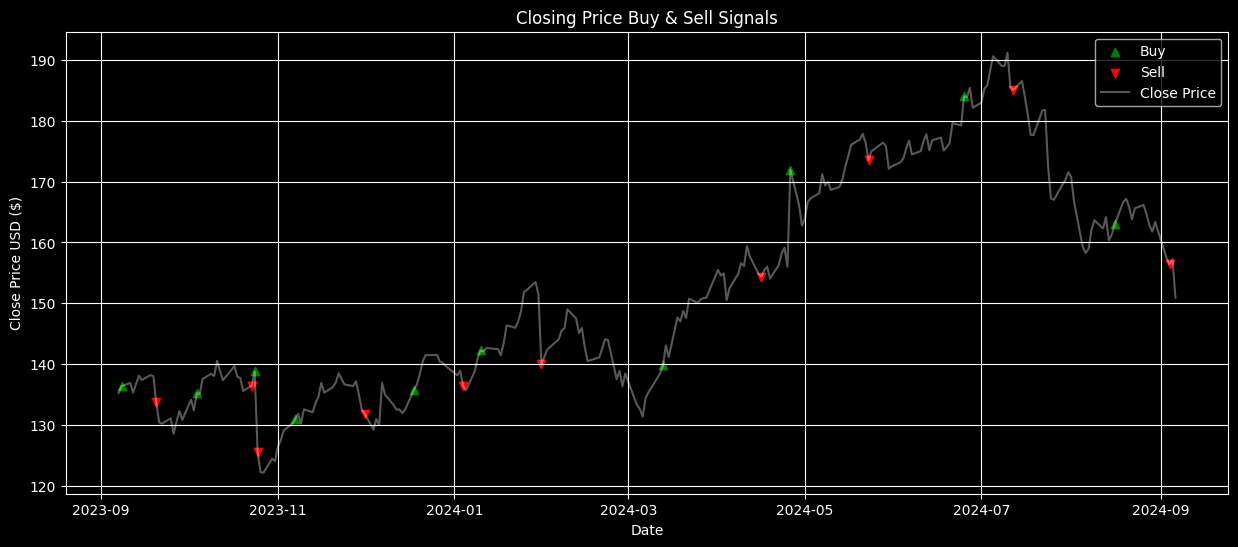

In [16]:
def plot_signals(dataframe):
    fig = plt.figure(figsize=(15, 6))
    plt.scatter(dataframe.index, dataframe['Buy_Signal_Price'], color='green', label='Buy', marker='^', alpha = 1)
    plt.scatter(dataframe.index, dataframe['Sell_Signal_Price'], color='red', label='Sell', marker='v', alpha = 1)
    plt.plot(dataframe['Close'], label='Close Price', color = 'white', alpha = 0.35)
    plt.title('Closing Price Buy & Sell Signals')
    plt.xlabel('Date')
    plt.ylabel('Close Price USD ($)')
    plt.legend(loc = 'upper right')
    plt.grid()
    plt.show()

plot_signals(google)

In [17]:
nvda_signal

([nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  44.78200149536133,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  45.005001068115234,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  48.88999938964844,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  52.25299835205078,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  78.81700134277344,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan

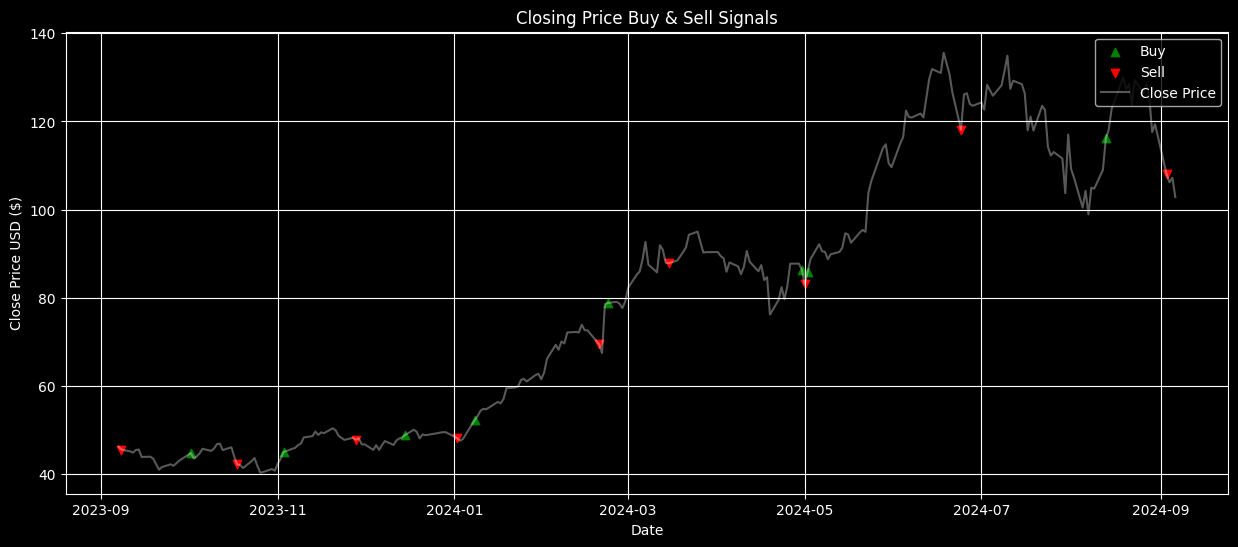

In [18]:
def plot_signals(dataframe):
    fig = plt.figure(figsize=(15, 6))
    plt.scatter(dataframe.index, dataframe['Buy_Signal_Price'], color='green', label='Buy', marker='^', alpha = 1)
    plt.scatter(dataframe.index, dataframe['Sell_Signal_Price'], color='red', label='Sell', marker='v', alpha = 1)
    plt.plot(dataframe['Close'], label='Close Price', color = 'white', alpha = 0.35)
    plt.title('Closing Price Buy & Sell Signals')
    plt.xlabel('Date')
    plt.ylabel('Close Price USD ($)')
    plt.legend(loc = 'upper right')
    plt.grid()
    plt.show()

plot_signals(nvda)

In [19]:
tesla_signal

([nan,
  nan,
  273.5799865722656,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  260.04998779296875,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  219.27000427246094,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  251.0500030517578,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  189.55999755859375,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  n

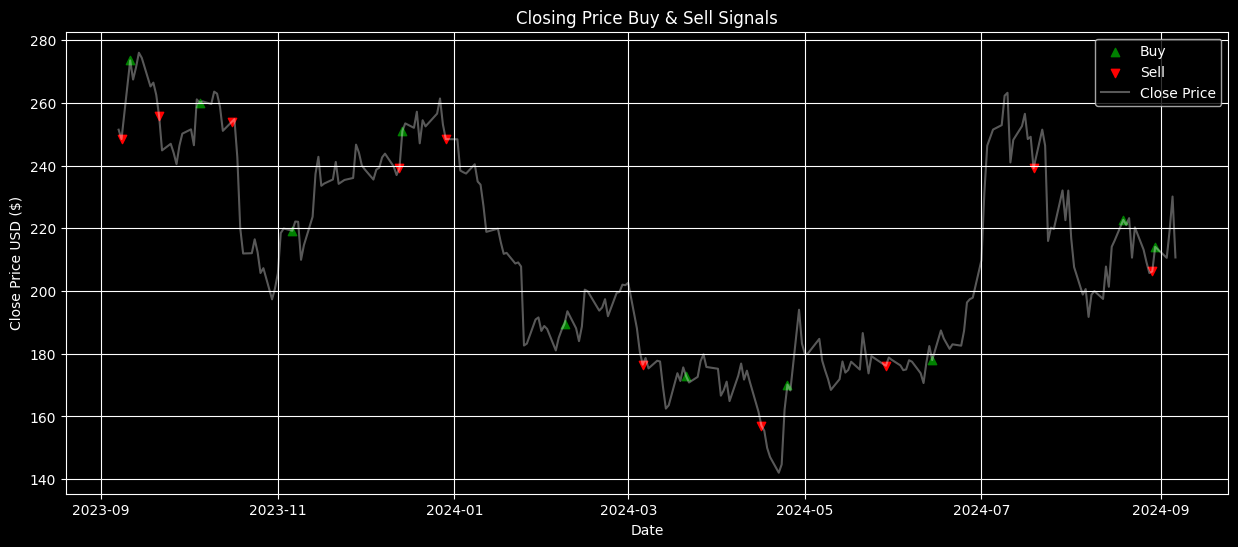

In [20]:
def plot_signals(dataframe):
    fig = plt.figure(figsize=(15, 6))
    plt.scatter(dataframe.index, dataframe['Buy_Signal_Price'], color='green', label='Buy', marker='^', alpha = 1)
    plt.scatter(dataframe.index, dataframe['Sell_Signal_Price'], color='red', label='Sell', marker='v', alpha = 1)
    plt.plot(dataframe['Close'], label='Close Price', color = 'white', alpha = 0.35)
    plt.title('Closing Price Buy & Sell Signals')
    plt.xlabel('Date')
    plt.ylabel('Close Price USD ($)')
    plt.legend(loc = 'upper right')
    plt.grid()
    plt.show()

plot_signals(tesla)

In [21]:
microsoft_signal

([nan,
  334.2699890136719,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  327.260009765625,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  382.7699890136719,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  414.04998779296875,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  425.2200012207031,
  nan,
  nan,

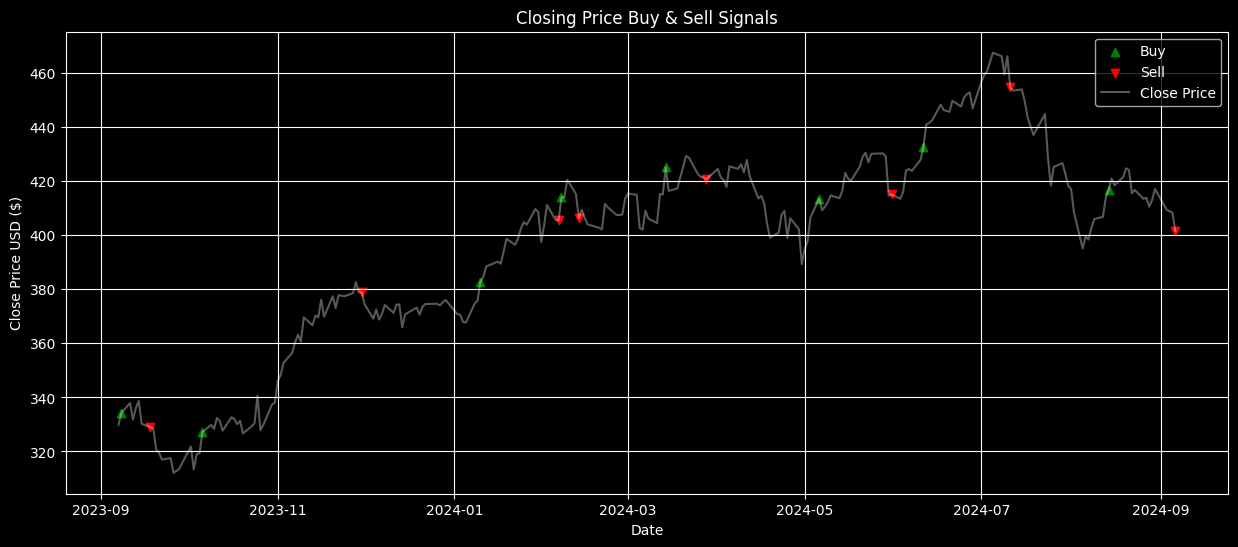

In [22]:
def plot_signals(dataframe):
    fig = plt.figure(figsize=(15, 6))
    plt.scatter(dataframe.index, dataframe['Buy_Signal_Price'], color='green', label='Buy', marker='^', alpha = 1)
    plt.scatter(dataframe.index, dataframe['Sell_Signal_Price'], color='red', label='Sell', marker='v', alpha = 1)
    plt.plot(dataframe['Close'], label='Close Price', color = 'white', alpha = 0.35)
    plt.title('Closing Price Buy & Sell Signals')
    plt.xlabel('Date')
    plt.ylabel('Close Price USD ($)')
    plt.legend(loc = 'upper right')
    plt.grid()
    plt.show()

plot_signals(microsoft)

In [23]:
def backtesting(dataframe):
    # We will first need to extract out the index of each Buy & Sell price
    # This is needed to get the 'Opening Price' of the next day - when the actual trade takes place
    Buy = []
    Sell = []

    for i in range(len(dataframe['Buy_Signal_Price'])):
               if not np.isnan(dataframe['Buy_Signal_Price'][i]):
                   Buy.append(i)

    for i in range(len(dataframe['Sell_Signal_Price'])):
               if not np.isnan(dataframe['Sell_Signal_Price'][i]):
                   Sell.append(i)

    Realbuys = [i+1 for i in Buy]
    Realsells = [i+1 for i in Sell]

    # We extract out the opening price for the day after the respective signals
    # Ensure the indices do not go out of bounds
    Buyprices = dataframe.Open.iloc[Realbuys] if Realbuys and max(Realbuys) < len(dataframe.Open) else []
    Sellprices = dataframe.Open.iloc[Realsells] if Realsells and max(Realsells) < len(dataframe.Open) else []

    # We will be dropping the signals if the selling signal is preceeded with no buying signal
    # Also applies for the signals if the buying signal is followed with no selling signal
    if len(Sellprices) > 0 and len(Buyprices) > 0: # Check if Sellprices and Buyprices are not empty
        if Sellprices.index[0] < Buyprices.index[0]:
            Sellprices = Sellprices.drop(Sellprices.index[0])
        elif Buyprices.index[-1] > Sellprices.index[-1]:
            Buyprices = Buyprices.drop(Buyprices.index[-1])

        # we would now be calculating relative profits
        relative_profits = []
        for i in range(len(Sellprices)):
            relative_profits.append((Sellprices[i] - Buyprices[i])/Buyprices[i])
        if len(relative_profits) > 0: # Check if relative_profits is not empty
            return sum(relative_profits)/len(relative_profits) * 100
        else:
            return 0 # Return 0 if no trades were made
    else:
        return 0 # Return 0 if no trades were made

print("The Algorithm was able to generate a {}% profit over the past year for Tesla"
      .format(round(backtesting(tesla), 2)))

print("The Algorithm was able to generate a {}% profit over the past year for Nvidia"
      .format(round(backtesting(nvda), 2)))

print("The Algorithm was able to generate a {}% profit over the past year for Microsoft"
      .format(round(backtesting(microsoft), 2)))

print("The Algorithm was able to generate a {}% profit over the past year for Google"
      .format(round(backtesting(google), 2)))

The Algorithm was able to generate a 2.75% profit over the past year for Tesla
The Algorithm was able to generate a 8.49% profit over the past year for Nvidia
The Algorithm was able to generate a 0% profit over the past year for Microsoft
The Algorithm was able to generate a 0.22% profit over the past year for Google
